<b>Background</b>

<em>Project Problem and Hypothesis</em>

My project is about exploring where ICT (information communications technology) is most correlated with sustainable development (measured using proxy indicators for the Sustainable Development Goals), which can point to what areas of sustainable development potentially benefit the most from ICT investment, and what areas of sustainable development have so far not (low correlation)benefited from ICT investment, but there could be potential to do so.

The problem I am solving is two-fold: 1.) Better understanding the relationship between ICT and sustainable development, and 2.) Helping to prioritize where to potentially invest in ICT to support sustainable development.
I will be predicting a continuous variable, which will be the correlation (measured by R-squared) between ICT variables and sustainable development variables. Given areas of sustainable development where ICT is most correlated, I can predict that applying ICT solutions to those sustainable development problems, I can predict where else similar application may be beneficial. For example, in the U.S. there is large development of ICT to run streaming videos rather than develop remote diagnostics for health problems such as sudden-infant-death syndrome where the US performs below even developing countries).

I think this could have a positive impact, particularly to ICT and technology companies who are seeking contribution to the SDGs and to sustainable development priorities, and to sustainability practicioners, such as UN members, who are developing coalitions and initiatives to help countries achieve the SDGs by 2030. The analysis will add to an already roboust amount of information to help both parties prioritize which ICT initiatives to deploy on which sustainability objectives (e.g., health, education, clean water, etc.).

I predict the highest correlation will come from areas where ICT has already been widely used - such as in healthcare, education and industrialization. I also predict that GDP will play a large role in the correlation (wealthier nations tend to be more sustainable and have more developed ICT infrastructure), but will not be the most correlated. I will control for GDP in order to explore this more.

I will be running a linear regression model to explore my data. Then, I will use k-means clustering to locate relevant features, which I will isolate and then run a second linear regression with the features highlighted in the clustering. 

<em>Datasets</em>

I am using a data set compiled by the Sustainable Development Solutions Network (SDSN) and the Bertelsmann Stiftung that came out in July 2016, which contains over 60 features that covers the 17 Sustainable Development Goals. I am also using last years country scores according to the ITU's ICT Development Index, which measures the level of ICT development in 175 countries. I will also be using a World Bank dataset to obtain the value of "GDP per capita." I will normalize the numerical values in my data set and create dummy variables for the categorical ones. 

<b>Running the model</b>

In [212]:
#first I need to get set up 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [213]:
#I have three datasets I need to merge. I will start with the first one
sdg_data = pd.read_csv('../Final-Project-RM/Datasets/SDG_data.csv')

In [214]:
#the second
ict_data = pd.read_csv('../Final-Project-RM/Datasets/ICT_data.csv')

In [215]:
#and third 
gdp_data = pd.read_csv('../Final-Project-RM/Datasets/GDP_data.csv')

In [216]:
#now I need to merge them. I will do them one at a time. First GDP and SDG data 
newdf = pd.merge(gdp_data,sdg_data,on="Country_Name",how="outer")

In [217]:
#because my GDP dataset has more countries than my SDG one, I want to get rid of where there is NaN for SDGI_Score, a feature of the SDG dataset
newdf[newdf.SDGI_Score.isnull()]
data = newdf.dropna(subset=['SDGI_Score'])


In [218]:
data.head()

,Country_Name,GDP_2015,SDGI_Score,UNReg,UnRegSub,SDG1_190DAY_im,SDG2_CRLYLD,SDG2_NUE,SDG2_OBESITY,SDG2_UNDERNSH_im,...,SDG15_FORCHG,SDG15_REDLIST,SDG16_CPI,SDG16_GOVEFF,SDG16_HOMICIDE,SDG16_PRISON,SDG16_PRS,SDG16_SAFE,SDG16_U5REG,SDG17_GOVSPD
1,Afghanistan,594.3230812,36.50,Asia,Southern Asia,NaN,2.0206,NaN,2.9,26.799999,...,0.862703,0.835789,11.0,NaN,6.5,76.0,NaN,33.716116,37.4,NaN
2,Angola,4101.472152,44.01,Africa,Middle Africa,30.129999,0.8888,0.896844,10.2,14.200000,...,3.145623,0.935935,15.0,NaN,10.0,105.0,NaN,46.214709,35.6,NaN
3,Albania,3945.217582,60.77,Europe,Southern Europe,1.060000,4.8926,0.897876,17.6,NaN,...,5.045726,0.854346,36.0,3.567322,5.0,158.0,3.048397,61.408330,98.6,9.304088
6,United Arab Emirates,40438.76293,63.58,Asia,Western Asia,0.000000,NaN,1.160181,37.2,5.000000,...,NaN,0.868619,70.0,5.286217,0.7,238.0,5.459671,89.971806,100.0,NaN
7,Argentina,13467.41564,66.82,LAC,South America,0.000000,4.5550,0.340088,26.3,5.000000,...,12.585822,0.861084,32.0,2.336129,5.5,147.0,2.876021,42.929606,99.5,13.039469


In [219]:
print data.shape

(148, 63)


In [220]:
#that worked! Looks like I have 148 rows now of data with both SDG data and GDP. Now to merge the third dataset, ICT data
all_data = pd.merge(data,ict_data,on="Country_Name",how="outer")

In [221]:
print all_data.shape

(188, 64)


In [222]:
#looks like there are 40 more rows than what we need. Will need to drop rows that don't have data for both SDG and ICT
final_data = all_data.dropna(subset=['SDGI_Score'])
print final_data.shape

(148, 64)


In [249]:
filled_final_data = all_data.dropna(subset=['GDP_2015'])
print filled_final_data.shape

(143, 64)


In [250]:
final_data.head()

,Country_Name,GDP_2015,SDGI_Score,UNReg,UnRegSub,SDG1_190DAY_im,SDG2_CRLYLD,SDG2_NUE,SDG2_OBESITY,SDG2_UNDERNSH_im,...,SDG15_REDLIST,SDG16_CPI,SDG16_GOVEFF,SDG16_HOMICIDE,SDG16_PRISON,SDG16_PRS,SDG16_SAFE,SDG16_U5REG,SDG17_GOVSPD,IDI_2016_Value
0,Afghanistan,594.3230812,36.50,Asia,Southern Asia,NaN,2.0206,NaN,2.9,26.799999,...,0.835789,11.0,NaN,6.5,76.0,NaN,33.716116,37.4,NaN,1.73
1,Angola,4101.472152,44.01,Africa,Middle Africa,30.129999,0.8888,0.896844,10.2,14.200000,...,0.935935,15.0,NaN,10.0,105.0,NaN,46.214709,35.6,NaN,2.03
2,Albania,3945.217582,60.77,Europe,Southern Europe,1.060000,4.8926,0.897876,17.6,NaN,...,0.854346,36.0,3.567322,5.0,158.0,3.048397,61.408330,98.6,9.304088,4.92
3,United Arab Emirates,40438.76293,63.58,Asia,Western Asia,0.000000,NaN,1.160181,37.2,5.000000,...,0.868619,70.0,5.286217,0.7,238.0,5.459671,89.971806,100.0,NaN,7.11
4,Argentina,13467.41564,66.82,LAC,South America,0.000000,4.5550,0.340088,26.3,5.000000,...,0.861084,32.0,2.336129,5.5,147.0,2.876021,42.929606,99.5,13.039469,6.52


In [251]:
#Now that my separate datasets are combined, I need to clean it up a bit, including dealing with the NaNs. Where are the NaN?
final_data.isnull().sum()

Country_Name         0
GDP_2015             5
SDGI_Score           0
UNReg                0
UnRegSub             0
SDG1_190DAY_im      10
SDG2_CRLYLD          4
SDG2_NUE            15
SDG2_OBESITY         0
SDG2_UNDERNSH_im    13
SDG3_FERTILITY       3
SDG3_HALE            0
SDG3_MATMORT         0
SDG3_NEONAT          0
SDG3_PHYS           10
SDG3_SWB             4
SDG3_TB              0
SDG3_TRAFFIC         4
SDG3_U5MORT          0
SDG3_VAC             0
SDG4_LITERACY       22
SDG4_PRIMARY        13
SDG4_SCHLYRS         0
SDG5_CONTRA          3
SDG5_EDAT            3
SDG5_PARL            0
SDG6_FRESHWAT        3
SDG6_IMPSAN          1
SDG6_IMPWAT          0
SDG7_CO2TWH         25
                    ..
SDG8_CLABOR_im       9
SDG8_UNEMP           0
SDG9_INFRQUAL       12
SDG9_INTUSE          1
SDG9_LOGPERF         4
SDG9_RD_im          21
SDG10_GINI          15
SDG11_PIPEDWAT       7
SDG11_PM25           0
SDG12_MSW           13
SDG12_WASTEWAT       0
SDG13_CCVM           3
SDG13_CO2pC

In [252]:
#i'm going to put in the average of the total column for all my nulls. Not super specific, I know, but there a lot of
#nulls and I'm going to quickly address this 
filled_final_data = final_data.fillna(final_data.mean())

In [253]:
filled_final_data.isnull().sum()

Country_Name        0
GDP_2015            5
SDGI_Score          0
UNReg               0
UnRegSub            0
SDG1_190DAY_im      0
SDG2_CRLYLD         0
SDG2_NUE            0
SDG2_OBESITY        0
SDG2_UNDERNSH_im    0
SDG3_FERTILITY      0
SDG3_HALE           0
SDG3_MATMORT        0
SDG3_NEONAT         0
SDG3_PHYS           0
SDG3_SWB            0
SDG3_TB             0
SDG3_TRAFFIC        0
SDG3_U5MORT         0
SDG3_VAC            0
SDG4_LITERACY       0
SDG4_PRIMARY        0
SDG4_SCHLYRS        0
SDG5_CONTRA         0
SDG5_EDAT           0
SDG5_PARL           0
SDG6_FRESHWAT       0
SDG6_IMPSAN         0
SDG6_IMPWAT         0
SDG7_CO2TWH         0
                   ..
SDG8_CLABOR_im      0
SDG8_UNEMP          0
SDG9_INFRQUAL       0
SDG9_INTUSE         0
SDG9_LOGPERF        0
SDG9_RD_im          0
SDG10_GINI          0
SDG11_PIPEDWAT      0
SDG11_PM25          0
SDG12_MSW           0
SDG12_WASTEWAT      0
SDG13_CCVM          0
SDG13_CO2pCAP       0
SDG14_BIODIV        0
SDG14_CLEA

In [255]:
#i'm not sure why GDP_2015 was not filled all the way, so I'm just going to drop the ones that didn't get filled
final_final_data = filled_final_data.dropna(subset=['GDP_2015'])
print final_final_data.shape

(143, 64)


In [256]:
final_final_data.head()

,Country_Name,GDP_2015,SDGI_Score,UNReg,UnRegSub,SDG1_190DAY_im,SDG2_CRLYLD,SDG2_NUE,SDG2_OBESITY,SDG2_UNDERNSH_im,...,SDG15_REDLIST,SDG16_CPI,SDG16_GOVEFF,SDG16_HOMICIDE,SDG16_PRISON,SDG16_PRS,SDG16_SAFE,SDG16_U5REG,SDG17_GOVSPD,IDI_2016_Value
0,Afghanistan,594.3230812,36.50,Asia,Southern Asia,13.973623,2.020600,0.768439,2.9,26.799999,...,0.835789,11.0,3.624180,6.5,76.0,4.321877,33.716116,37.4,12.956443,1.73
1,Angola,4101.472152,44.01,Africa,Middle Africa,30.129999,0.888800,0.896844,10.2,14.200000,...,0.935935,15.0,3.624180,10.0,105.0,4.321877,46.214709,35.6,12.956443,2.03
2,Albania,3945.217582,60.77,Europe,Southern Europe,1.060000,4.892600,0.897876,17.6,10.709333,...,0.854346,36.0,3.567322,5.0,158.0,3.048397,61.408330,98.6,9.304088,4.92
3,United Arab Emirates,40438.76293,63.58,Asia,Western Asia,0.000000,3.453437,1.160181,37.2,5.000000,...,0.868619,70.0,5.286217,0.7,238.0,5.459671,89.971806,100.0,12.956443,7.11
4,Argentina,13467.41564,66.82,LAC,South America,0.000000,4.555000,0.340088,26.3,5.000000,...,0.861084,32.0,2.336129,5.5,147.0,2.876021,42.929606,99.5,13.039469,6.52


In [257]:
final_final_data.isnull().sum()

Country_Name        0
GDP_2015            0
SDGI_Score          0
UNReg               0
UnRegSub            0
SDG1_190DAY_im      0
SDG2_CRLYLD         0
SDG2_NUE            0
SDG2_OBESITY        0
SDG2_UNDERNSH_im    0
SDG3_FERTILITY      0
SDG3_HALE           0
SDG3_MATMORT        0
SDG3_NEONAT         0
SDG3_PHYS           0
SDG3_SWB            0
SDG3_TB             0
SDG3_TRAFFIC        0
SDG3_U5MORT         0
SDG3_VAC            0
SDG4_LITERACY       0
SDG4_PRIMARY        0
SDG4_SCHLYRS        0
SDG5_CONTRA         0
SDG5_EDAT           0
SDG5_PARL           0
SDG6_FRESHWAT       0
SDG6_IMPSAN         0
SDG6_IMPWAT         0
SDG7_CO2TWH         0
                   ..
SDG8_CLABOR_im      0
SDG8_UNEMP          0
SDG9_INFRQUAL       0
SDG9_INTUSE         0
SDG9_LOGPERF        0
SDG9_RD_im          0
SDG10_GINI          0
SDG11_PIPEDWAT      0
SDG11_PM25          0
SDG12_MSW           0
SDG12_WASTEWAT      0
SDG13_CCVM          0
SDG13_CO2pCAP       0
SDG14_BIODIV        0
SDG14_CLEA

In [258]:
#now to create dummy variables for my categorical data
final_final_data.UNReg.unique()

array(['Asia', 'Africa', 'Europe', 'LAC', 'Oceania', 'North America'], dtype=object)

In [259]:
final_final_data.UnRegSub.unique()

array(['Southern Asia', 'Middle Africa', 'Southern Europe', 'Western Asia',
       'South America', 'Australia and New Zealand', 'Western Europe',
       'Eastern Africa', 'Western Africa', 'Eastern Europe',
       'Southern Africa', 'Northern America', 'Eastern Asia',
       'Central America', 'Northern Europe', 'Caribbean',
       'Northern Africa', 'South-Eastern Asia', 'Central Asia'], dtype=object)

In [260]:
UNReg_dummies = pd.get_dummies(final_final_data.UNReg, prefix='UNReg').iloc[:, 1:]
final_final_data = pd.concat([final_final_data, UNReg_dummies], axis=1)

In [261]:
filled_final_data.head()

,Country_Name,GDP_2015,SDGI_Score,UNReg,UnRegSub,SDG1_190DAY_im,SDG2_CRLYLD,SDG2_NUE,SDG2_OBESITY,SDG2_UNDERNSH_im,...,SDG15_REDLIST,SDG16_CPI,SDG16_GOVEFF,SDG16_HOMICIDE,SDG16_PRISON,SDG16_PRS,SDG16_SAFE,SDG16_U5REG,SDG17_GOVSPD,IDI_2016_Value
0,Afghanistan,594.3230812,36.50,Asia,Southern Asia,13.973623,2.020600,0.768439,2.9,26.799999,...,0.835789,11.0,3.624180,6.5,76.0,4.321877,33.716116,37.4,12.956443,1.73
1,Angola,4101.472152,44.01,Africa,Middle Africa,30.129999,0.888800,0.896844,10.2,14.200000,...,0.935935,15.0,3.624180,10.0,105.0,4.321877,46.214709,35.6,12.956443,2.03
2,Albania,3945.217582,60.77,Europe,Southern Europe,1.060000,4.892600,0.897876,17.6,10.709333,...,0.854346,36.0,3.567322,5.0,158.0,3.048397,61.408330,98.6,9.304088,4.92
3,United Arab Emirates,40438.76293,63.58,Asia,Western Asia,0.000000,3.453437,1.160181,37.2,5.000000,...,0.868619,70.0,5.286217,0.7,238.0,5.459671,89.971806,100.0,12.956443,7.11
4,Argentina,13467.41564,66.82,LAC,South America,0.000000,4.555000,0.340088,26.3,5.000000,...,0.861084,32.0,2.336129,5.5,147.0,2.876021,42.929606,99.5,13.039469,6.52


In [262]:
x = final_final_data.drop("UNReg",axis=1)

In [263]:
UnRegSub_dummies = pd.get_dummies(x.UnRegSub, prefix='UnRegSub').iloc[:, 1:]
y = pd.concat([x, UnRegSub_dummies], axis=1)
y.head()

,Country_Name,GDP_2015,SDGI_Score,UnRegSub,SDG1_190DAY_im,SDG2_CRLYLD,SDG2_NUE,SDG2_OBESITY,SDG2_UNDERNSH_im,SDG3_FERTILITY,...,UnRegSub_Northern America,UnRegSub_Northern Europe,UnRegSub_South America,UnRegSub_South-Eastern Asia,UnRegSub_Southern Africa,UnRegSub_Southern Asia,UnRegSub_Southern Europe,UnRegSub_Western Africa,UnRegSub_Western Asia,UnRegSub_Western Europe
0,Afghanistan,594.3230812,36.50,Southern Asia,13.973623,2.020600,0.768439,2.9,26.799999,51.9,...,0,0,0,0,0,1,0,0,0,0
1,Angola,4101.472152,44.01,Middle Africa,30.129999,0.888800,0.896844,10.2,14.200000,190.9,...,0,0,0,0,0,0,0,0,0,0
2,Albania,3945.217582,60.77,Southern Europe,1.060000,4.892600,0.897876,17.6,10.709333,19.7,...,0,0,0,0,0,0,1,0,0,0
3,United Arab Emirates,40438.76293,63.58,Western Asia,0.000000,3.453437,1.160181,37.2,5.000000,34.2,...,0,0,0,0,0,0,0,0,1,0
4,Argentina,13467.41564,66.82,South America,0.000000,4.555000,0.340088,26.3,5.000000,68.1,...,0,0,1,0,0,0,0,0,0,0


In [264]:
z = y.drop("UnRegSub",axis=1)
z.head()

,Country_Name,GDP_2015,SDGI_Score,SDG1_190DAY_im,SDG2_CRLYLD,SDG2_NUE,SDG2_OBESITY,SDG2_UNDERNSH_im,SDG3_FERTILITY,SDG3_HALE,...,UnRegSub_Northern America,UnRegSub_Northern Europe,UnRegSub_South America,UnRegSub_South-Eastern Asia,UnRegSub_Southern Africa,UnRegSub_Southern Asia,UnRegSub_Southern Europe,UnRegSub_Western Africa,UnRegSub_Western Asia,UnRegSub_Western Europe
0,Afghanistan,594.3230812,36.50,13.973623,2.020600,0.768439,2.9,26.799999,51.9,50.0,...,0,0,0,0,0,1,0,0,0,0
1,Angola,4101.472152,44.01,30.129999,0.888800,0.896844,10.2,14.200000,190.9,44.0,...,0,0,0,0,0,0,0,0,0,0
2,Albania,3945.217582,60.77,1.060000,4.892600,0.897876,17.6,10.709333,19.7,65.0,...,0,0,0,0,0,0,1,0,0,0
3,United Arab Emirates,40438.76293,63.58,0.000000,3.453437,1.160181,37.2,5.000000,34.2,67.0,...,0,0,0,0,0,0,0,0,1,0
4,Argentina,13467.41564,66.82,0.000000,4.555000,0.340088,26.3,5.000000,68.1,67.0,...,0,0,1,0,0,0,0,0,0,0


In [265]:
#i also need to drop Country_Name since it's also a categorical but is not repeated 
#i should make a copy of the original dataset...how do I do that?
#z.DataFrame.copy(deep=True)
data = z.drop("Country_Name",axis=1)
data.head()

,GDP_2015,SDGI_Score,SDG1_190DAY_im,SDG2_CRLYLD,SDG2_NUE,SDG2_OBESITY,SDG2_UNDERNSH_im,SDG3_FERTILITY,SDG3_HALE,SDG3_MATMORT,...,UnRegSub_Northern America,UnRegSub_Northern Europe,UnRegSub_South America,UnRegSub_South-Eastern Asia,UnRegSub_Southern Africa,UnRegSub_Southern Asia,UnRegSub_Southern Europe,UnRegSub_Western Africa,UnRegSub_Western Asia,UnRegSub_Western Europe
0,594.3230812,36.50,13.973623,2.020600,0.768439,2.9,26.799999,51.9,50.0,396.0,...,0,0,0,0,0,1,0,0,0,0
1,4101.472152,44.01,30.129999,0.888800,0.896844,10.2,14.200000,190.9,44.0,477.0,...,0,0,0,0,0,0,0,0,0,0
2,3945.217582,60.77,1.060000,4.892600,0.897876,17.6,10.709333,19.7,65.0,29.0,...,0,0,0,0,0,0,1,0,0,0
3,40438.76293,63.58,0.000000,3.453437,1.160181,37.2,5.000000,34.2,67.0,6.0,...,0,0,0,0,0,0,0,0,1,0
4,13467.41564,66.82,0.000000,4.555000,0.340088,26.3,5.000000,68.1,67.0,52.0,...,0,0,1,0,0,0,0,0,0,0


In [266]:
data.isnull().sum()

GDP_2015                       0
SDGI_Score                     0
SDG1_190DAY_im                 0
SDG2_CRLYLD                    0
SDG2_NUE                       0
SDG2_OBESITY                   0
SDG2_UNDERNSH_im               0
SDG3_FERTILITY                 0
SDG3_HALE                      0
SDG3_MATMORT                   0
SDG3_NEONAT                    0
SDG3_PHYS                      0
SDG3_SWB                       0
SDG3_TB                        0
SDG3_TRAFFIC                   0
SDG3_U5MORT                    0
SDG3_VAC                       0
SDG4_LITERACY                  0
SDG4_PRIMARY                   0
SDG4_SCHLYRS                   0
SDG5_CONTRA                    0
SDG5_EDAT                      0
SDG5_PARL                      0
SDG6_FRESHWAT                  0
SDG6_IMPSAN                    0
SDG6_IMPWAT                    0
SDG7_CO2TWH                    0
SDG7_ELECAC                    0
SDG7_NSFUELAC                  0
SDG8_ADJGROWTH                 0
          

In [482]:
data.corr()

,SDGI_Score,SDG1_190DAY_im,SDG2_CRLYLD,SDG2_NUE,SDG2_OBESITY,SDG2_UNDERNSH_im,SDG3_FERTILITY,SDG3_HALE,SDG3_MATMORT,SDG3_NEONAT,...,UnRegSub_Northern America,UnRegSub_Northern Europe,UnRegSub_South America,UnRegSub_South-Eastern Asia,UnRegSub_Southern Africa,UnRegSub_Southern Asia,UnRegSub_Southern Europe,UnRegSub_Western Africa,UnRegSub_Western Asia,UnRegSub_Western Europe
SDGI_Score,1.000000,-0.817423,0.661223,-0.361775,0.623931,-0.719649,-0.816790,0.875741,-0.799323,-0.861498,...,0.138756,0.392616,0.041709,-0.054249,-0.116142,-0.173938,0.205434,-0.459375,0.071570,0.330864
SDG1_190DAY_im,-0.817423,1.000000,-0.511787,0.144162,-0.613071,0.637557,0.760806,-0.799048,0.817429,0.728627,...,-0.080457,-0.185239,-0.123333,-0.060938,0.161837,0.011510,-0.199334,0.484869,-0.174853,-0.153263
SDG2_CRLYLD,0.661223,-0.511787,1.000000,-0.443251,0.366510,-0.484894,-0.556184,0.640318,-0.528045,-0.592209,...,0.118825,0.203196,0.066433,0.059272,-0.189995,-0.041314,0.187048,-0.334622,0.019210,0.419889
SDG2_NUE,-0.361775,0.144162,-0.443251,1.000000,-0.063931,0.232031,0.242817,-0.222468,0.161643,0.245577,...,-0.232425,-0.304565,-0.154695,-0.014989,0.023432,0.057173,0.004223,0.099840,0.224455,-0.217078
SDG2_OBESITY,0.623931,-0.613071,0.366510,-0.063931,1.000000,-0.530616,-0.503052,0.569721,-0.580789,-0.632345,...,0.171266,0.166261,0.142368,-0.335586,0.048606,-0.319015,0.124847,-0.322932,0.423720,0.075243
SDG2_UNDERNSH_im,-0.719649,0.637557,-0.484894,0.232031,-0.530616,1.000000,0.604521,-0.653767,0.538425,0.598720,...,-0.104992,-0.241726,-0.059670,-0.007123,0.201548,0.142288,-0.154099,0.058636,-0.151231,-0.200000
SDG3_FERTILITY,-0.816790,0.760806,-0.556184,0.242817,-0.503052,0.604521,1.000000,-0.800986,0.790022,0.786791,...,-0.085616,-0.250476,0.102810,-0.057444,0.062676,-0.018584,-0.262606,0.416366,-0.174610,-0.225765
SDG3_HALE,0.875741,-0.799048,0.640318,-0.222468,0.569721,-0.653767,-0.800986,1.000000,-0.859179,-0.892614,...,0.122595,0.249131,0.099010,0.045879,-0.266254,-0.097306,0.250609,-0.445457,0.177078,0.258982
SDG3_MATMORT,-0.799323,0.817429,-0.528045,0.161643,-0.580789,0.538425,0.790022,-0.859179,1.000000,0.818383,...,-0.077445,-0.181815,-0.082910,-0.069505,0.096513,0.030469,-0.197453,0.563476,-0.199954,-0.151191
SDG3_NEONAT,-0.861498,0.728627,-0.592209,0.245577,-0.632345,0.598720,0.786791,-0.892614,0.818383,1.000000,...,-0.101592,-0.263681,-0.060625,0.007269,0.102191,0.247494,-0.261736,0.458493,-0.170263,-0.219853


In [466]:
#i'm going to make a correlation matrix to get to know my data better
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

                             SDGI_Score  SDG1_190DAY_im  SDG2_CRLYLD  \
SDGI_Score                     1.000000       -0.817423     0.661223   
SDG1_190DAY_im                -0.817423        1.000000    -0.511787   
SDG2_CRLYLD                    0.661223       -0.511787     1.000000   
SDG2_NUE                      -0.361775        0.144162    -0.443251   
SDG2_OBESITY                   0.623931       -0.613071     0.366510   
SDG2_UNDERNSH_im              -0.719649        0.637557    -0.484894   
SDG3_FERTILITY                -0.816790        0.760806    -0.556184   
SDG3_HALE                      0.875741       -0.799048     0.640318   
SDG3_MATMORT                  -0.799323        0.817429    -0.528045   
SDG3_NEONAT                   -0.861498        0.728627    -0.592209   
SDG3_PHYS                      0.761076       -0.609893     0.520649   
SDG3_SWB                       0.760296       -0.635995     0.567801   
SDG3_TB                       -0.563595        0.541690    -0.41

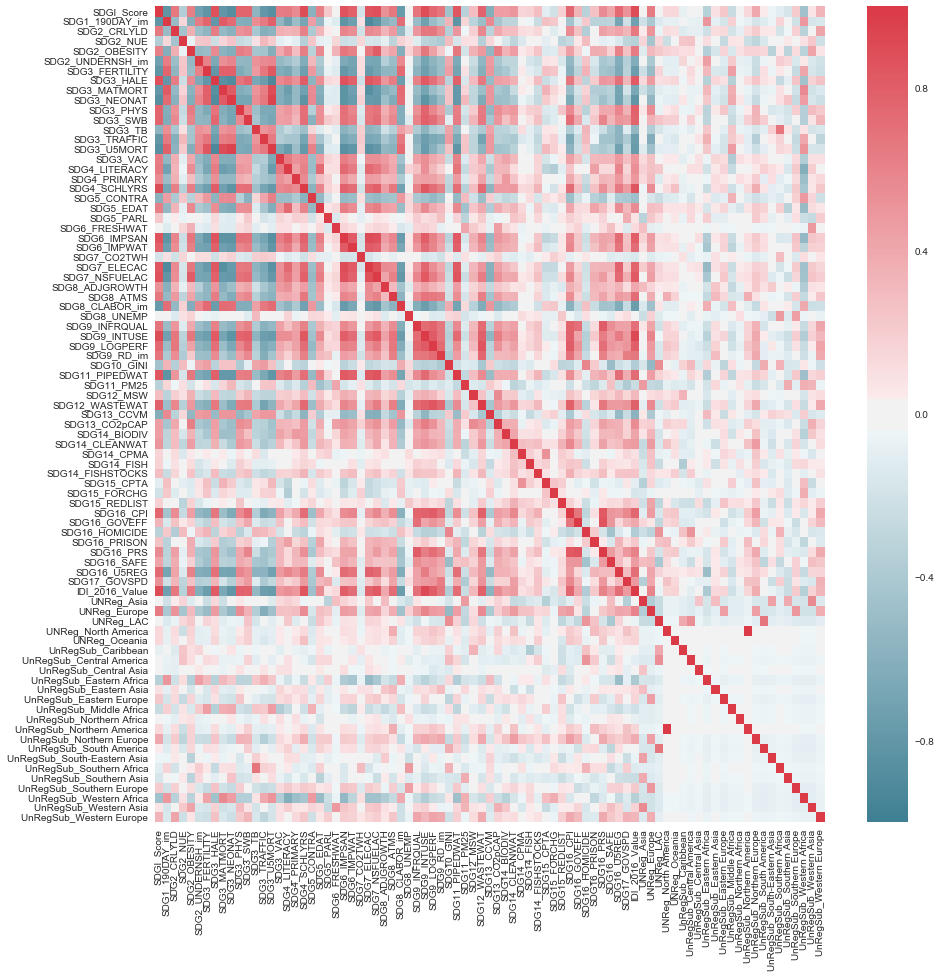

In [467]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(15,15))

correlations = data.corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)


In [370]:
#now I will try a linear regression using scikit-Learn 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn import cross_validation 
from sklearn import feature_selection, linear_model

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [468]:
#i scale my data to normalize it 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [469]:
data_scaled.shape

(143, 84)

In [470]:
#data_scaled_df = pd.DataFrame(data_scaled)
#data_scaled_df.head()

In [472]:
#And then I run a linear regression 

#X = data_scaled_df.drop(62, axis=1) < not sure if I need to drop a variable, but can't do it with the scaled data now

lm = linear_model.LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [473]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,data_scaled, test_size=.33, random_state = 5)
print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape 

(95, 83)
(48, 83)
(95, 84)
(48, 84)


In [474]:
lm = linear_model.LinearRegression()
lm.fit(X_train,Y_train)

data_scaled_df = pd.DataFrame(data_scaled)


pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [475]:
print 'Fit a model X_train, and calculate MSE with Y_train:', np.mean((Y_train - lm.predict(X_train)) ** 2)

Fit a model X_train, and calculate MSE with Y_train: 8.18317416614e-30


In [476]:
print 'Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((Y_test - lm.predict(X_test)) ** 2)

Fit a model X_train, and calculate MSE with X_test, Y_test: 0.0765273057779


In [477]:
print('Estimated intercept coefficient', lm.intercept_)
print('Number of coefficients', len(lm.coef_))
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((lm.predict(X_test) - Y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(X_test, Y_test))

('Estimated intercept coefficient', array([  1.00576377e-04,  -5.03803405e-05,   1.74813712e-04,
         1.11686538e-04,   4.03042724e-04,  -3.49627424e-04,
        -4.85593644e-04,  -2.08805267e-04,   4.27322407e-04,
        -2.45224790e-04,   2.96212123e-04,  -4.37034279e-05,
         5.07445358e-04,   5.63288627e-04,   3.30203678e-04,
         4.17610534e-04,   2.13661203e-04,  -1.86043065e-04,
         4.20038502e-04,   9.71187288e-06,   4.22466470e-04,
         8.49788877e-05,   5.25655119e-04,  -1.69957775e-04,
        -4.85593644e-05,   9.71187288e-06,   2.33084949e-04,
         1.39608173e-04,   1.89381521e-04,  -2.18517140e-04,
         2.42796823e-06,   8.61928718e-05,   8.98348241e-05,
        -2.81644313e-04,  -4.85593644e-06,  -1.84525585e-04,
        -5.82712373e-05,   2.52508695e-04,   4.41890216e-04,
         2.42796822e-04,  -1.94237458e-05,  -1.44464109e-04,
         2.03949330e-04,   2.10019251e-04,  -2.36119909e-04,
        -5.94852214e-05,  -1.45678093e-05,  -4.00

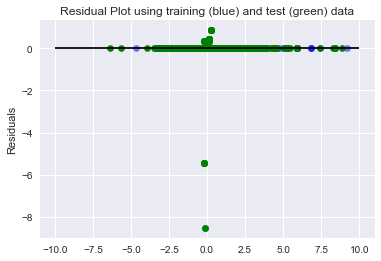

In [481]:
#let's take a look at the residuals to see if I've done a good job with this data


plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y=0, xmin=-10, xmax=10)

plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

In [ ]:
#my residuals look ok. It's a little hard to see. 
#Next I will try Lasso and then Ridge regression to hone in on the relevant features

In [456]:
#I want to see which features may have been the most related to IDI_2016_Value - this is using non-scaled data 
def get_linear_model_metrics(X, y, data_df):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    data_df.fit(X,y)
    residuals = (y-data_df.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', data_df.coef_
    print 'y-intercept:', data_df.intercept_
    print 'R-Squared:', data_df.score(X,y)
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))))
    # keep the model
    return data_df

In [464]:
#how do I do this with the scaled data?
y = data_scaled_df[:62]
x_sets = (
    [1],[2],[3]
)

for x in x_sets:
    print ', '.join(x)
    get_linear_model_metrics(data_scaled_df[x], y, linear_model.LinearRegression())
    print

TypeError: sequence item 0: expected string, int found

SDGI_Score
P Values: [  2.64680425e-53]
Coefficients: [ 0.14435631]
y-intercept: -3.40581798767
R-Squared: 0.813687364479

SDG1_190DAY_im
P Values: [  6.97738074e-25]
Coefficients: [-0.07600211]
y-intercept: 6.17200415444
R-Squared: 0.530014887563

SDG2_CRLYLD
P Values: [  5.52083816e-19]
Coefficients: [ 0.66534071]
y-intercept: 2.76572971237
R-Squared: 0.430978072452

SDG2_CRLYLD
P Values: [  5.52083816e-19]
Coefficients: [ 0.66534071]
y-intercept: 2.76572971237
R-Squared: 0.430978072452

SDG2_NUE
P Values: [  3.39712494e-05]
Coefficients: [-3.7516558]
y-intercept: 7.97568011385
R-Squared: 0.115102708267

SDG2_OBESITY
P Values: [  6.86766203e-18]
Coefficients: [ 0.15202247]
y-intercept: 2.41705929986
R-Squared: 0.410460819967

SDG2_UNDERNSH_im
P Values: [  4.72215569e-17]
Coefficients: [-0.12807142]
y-intercept: 6.45622570144
R-Squared: 0.394282728397

SDG3_FERTILITY
P Values: [  3.94882541e-27]
Coefficients: [-0.03318157]
y-intercept: 6.92602290615
R-Squared: 0.563091600495

SDG3_HAL

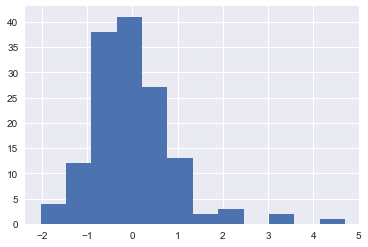

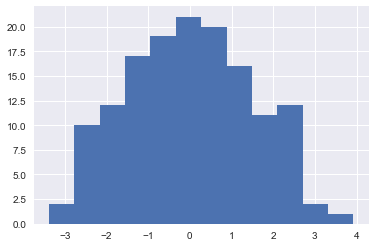

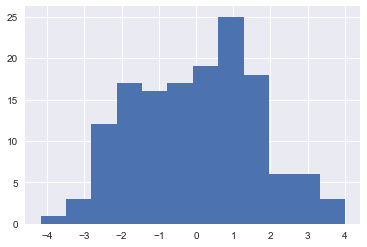

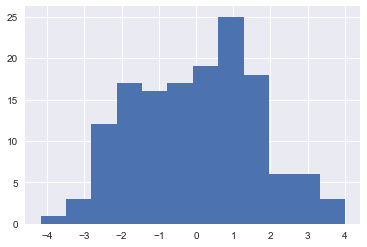

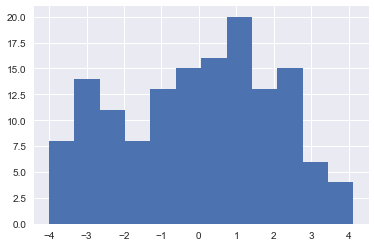

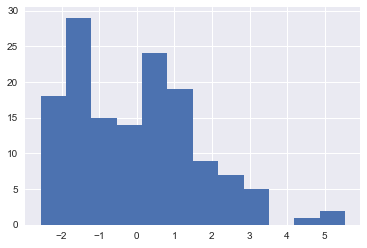

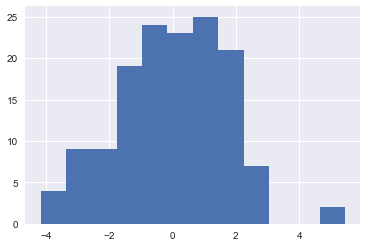

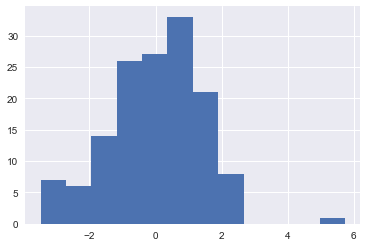

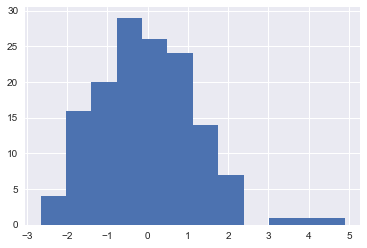

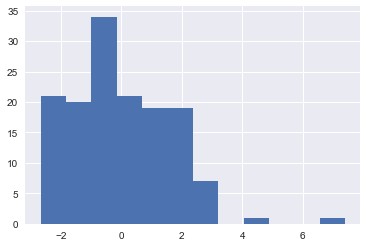

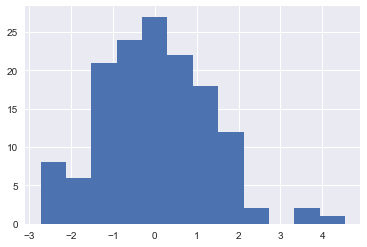

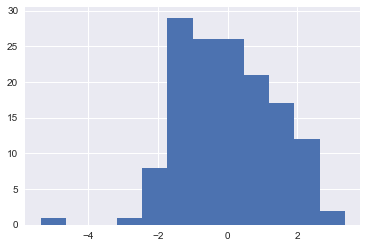

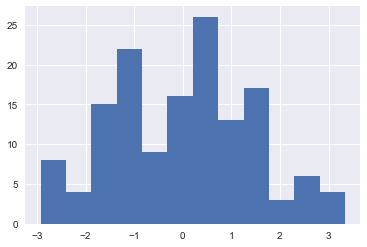

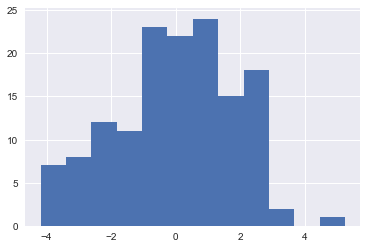

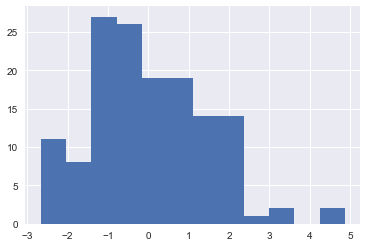

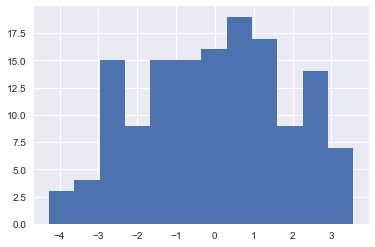

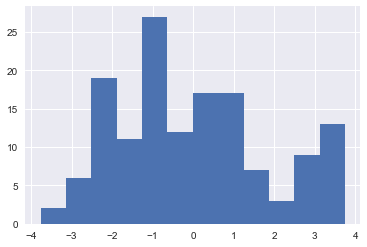

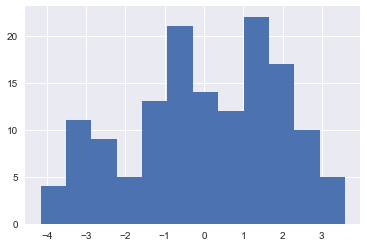

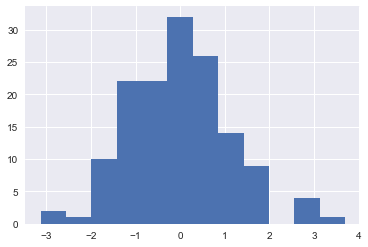

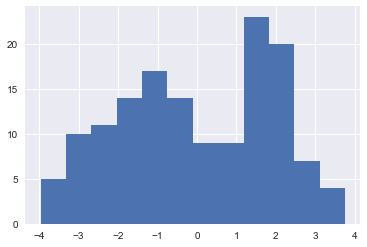

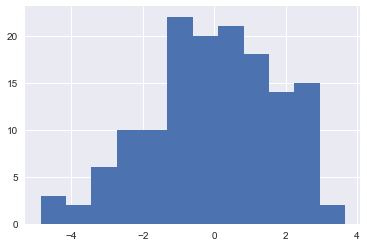

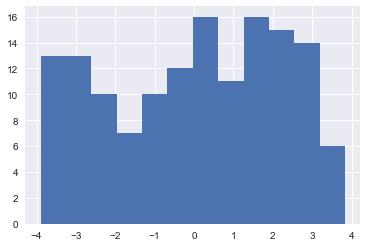

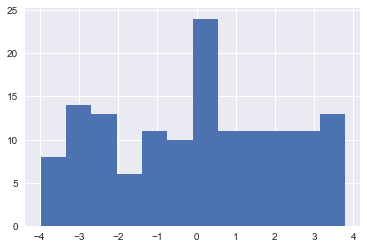

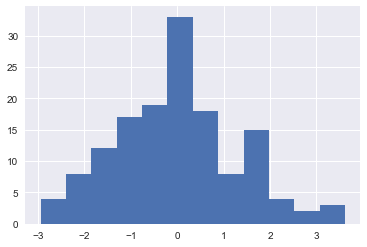

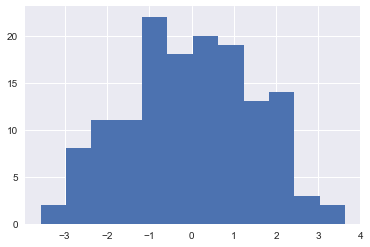

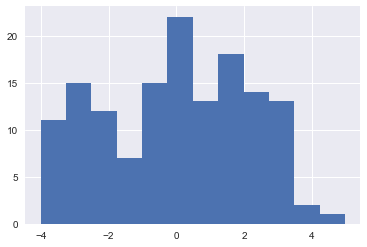

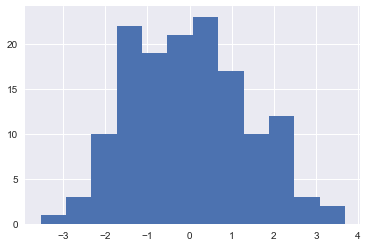

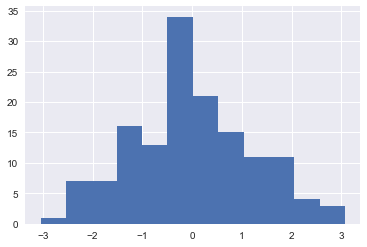

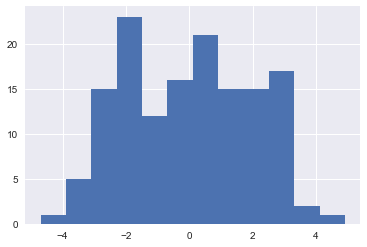

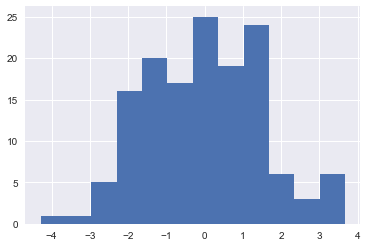

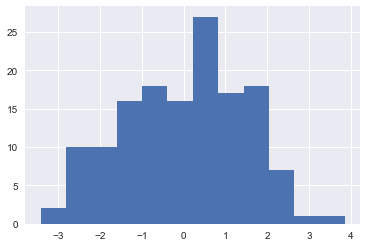

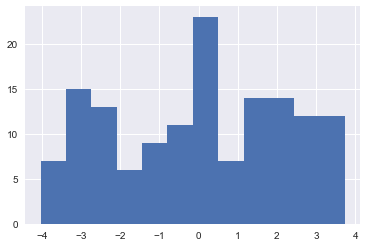

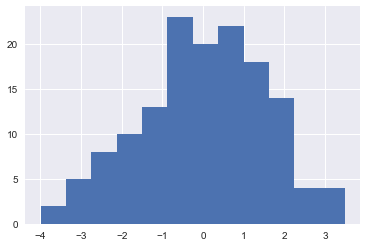

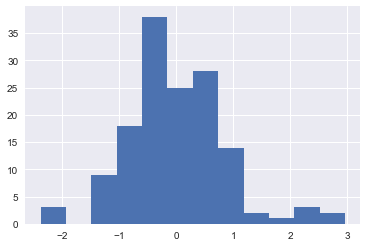

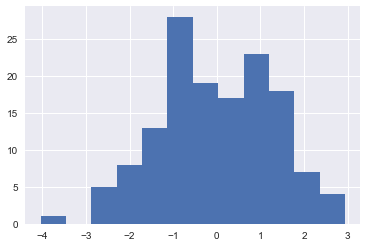

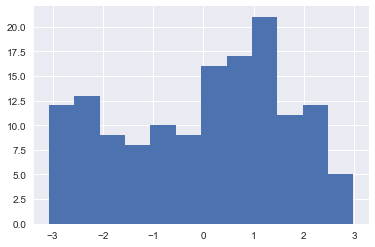

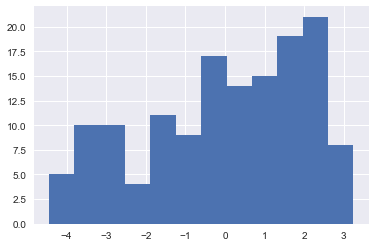

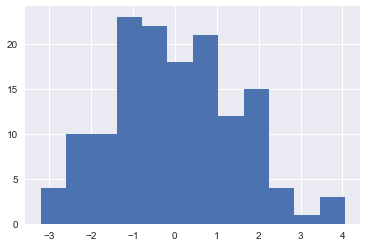

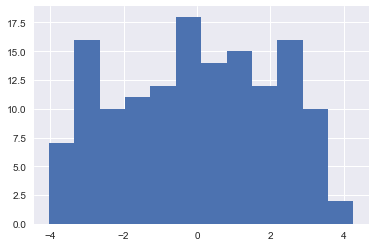

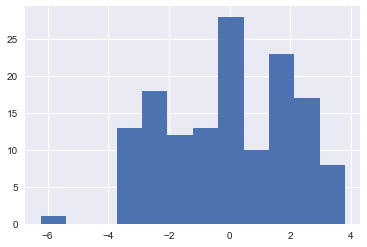

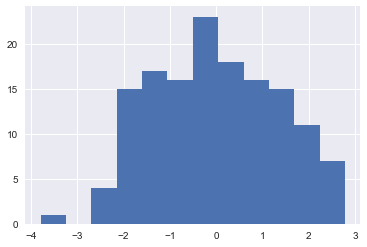

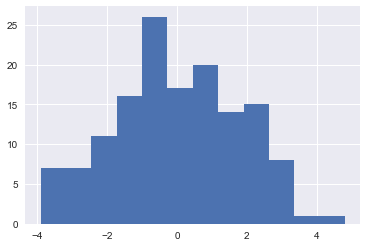

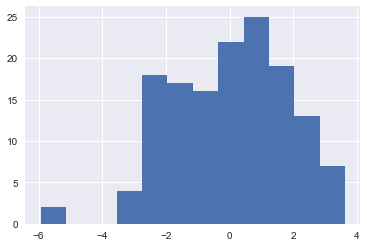

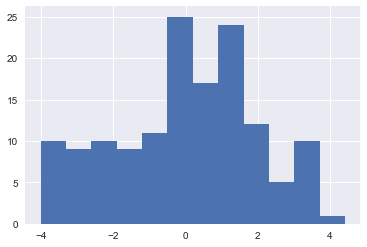

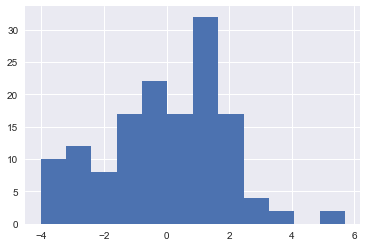

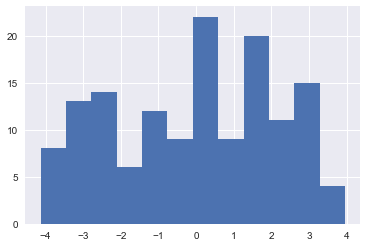

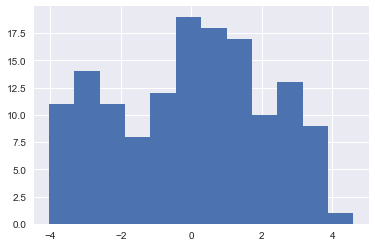

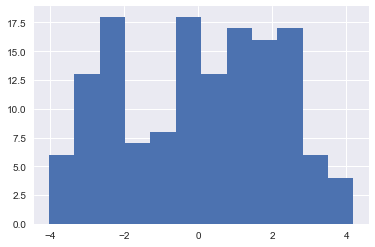

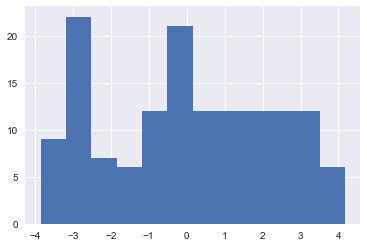

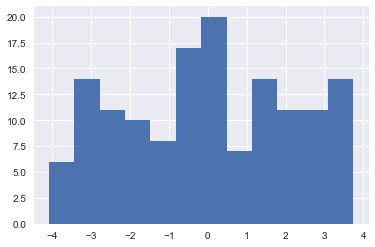

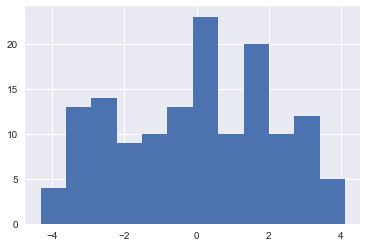

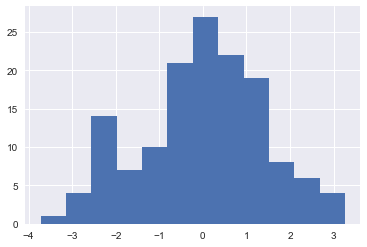

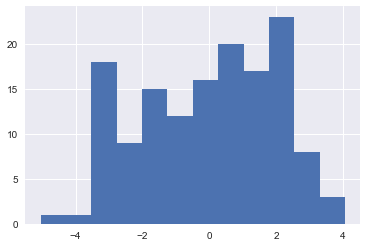

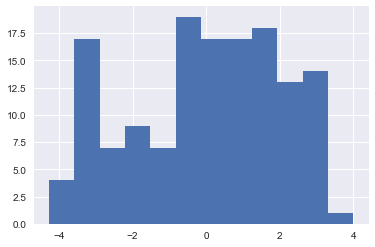

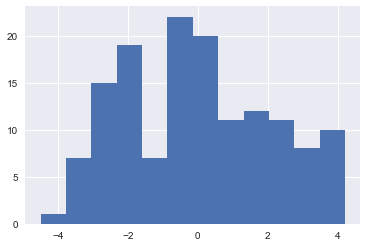

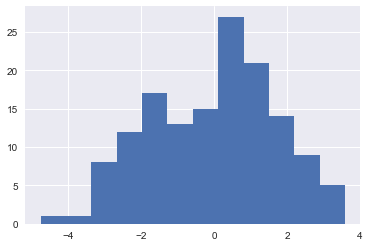

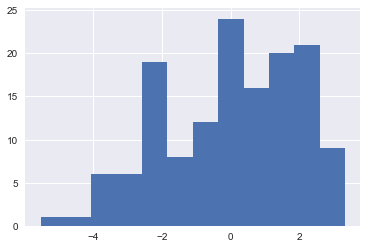

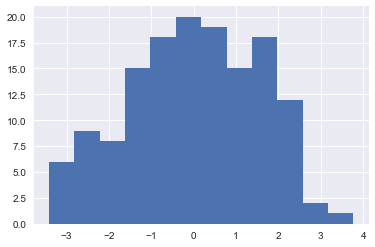

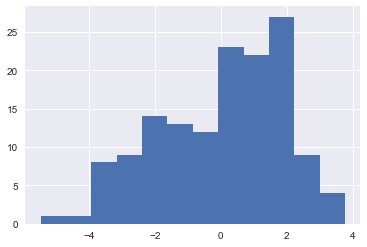

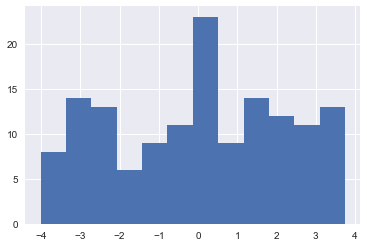

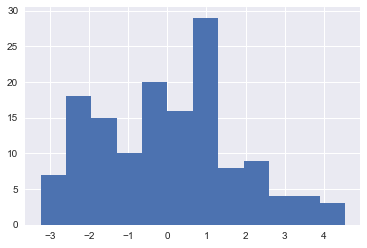

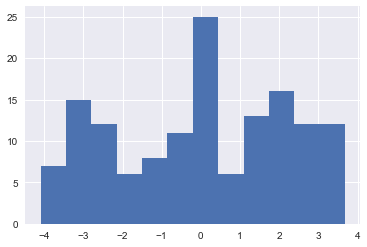

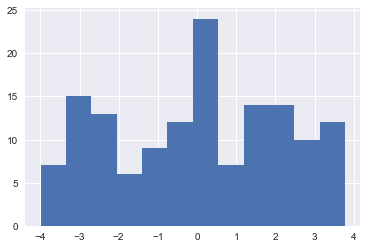

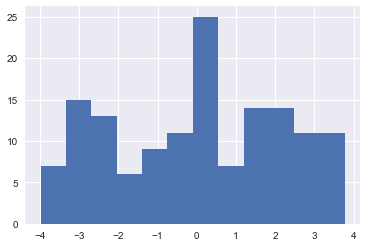

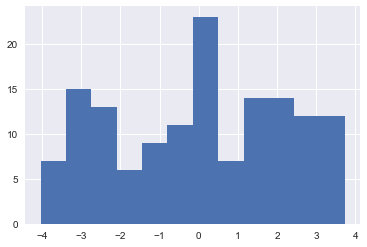

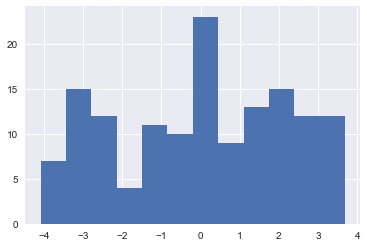

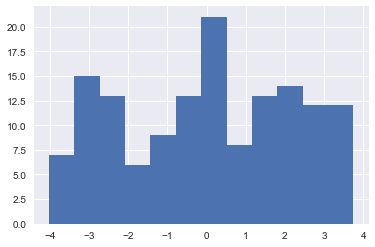

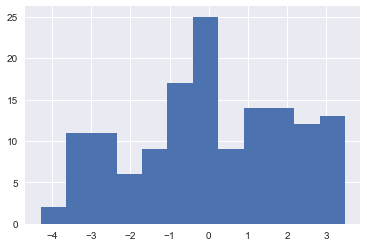

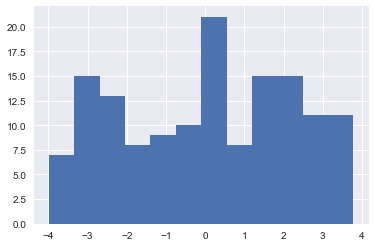

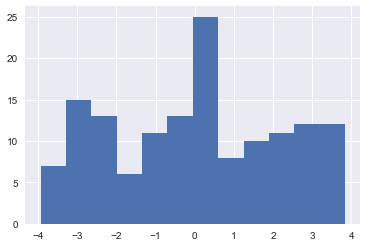

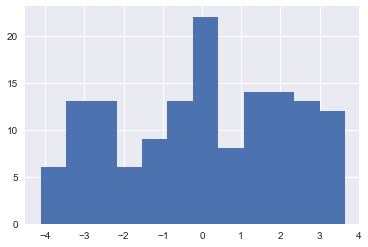

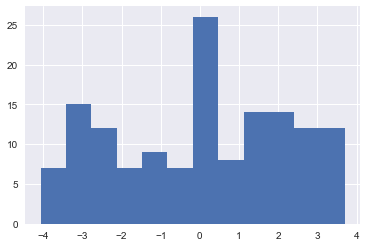

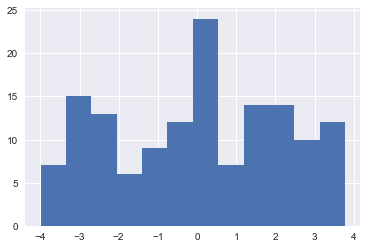

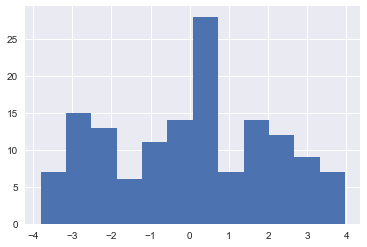

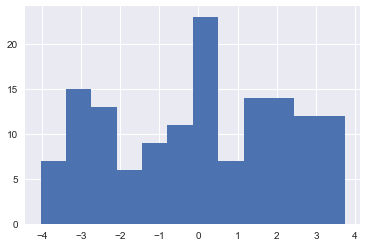

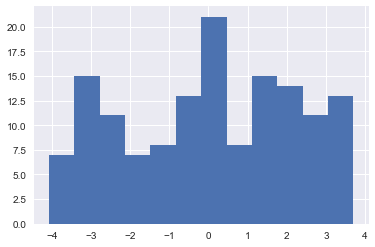

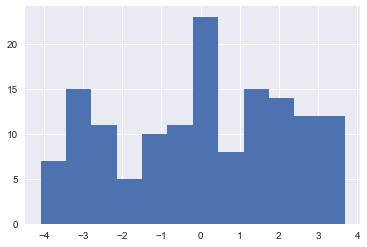

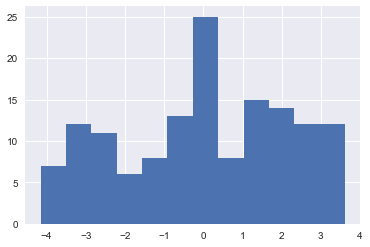

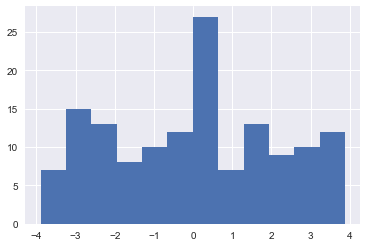

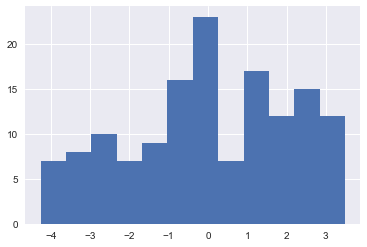

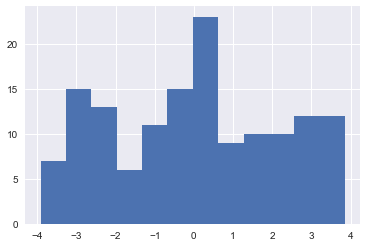

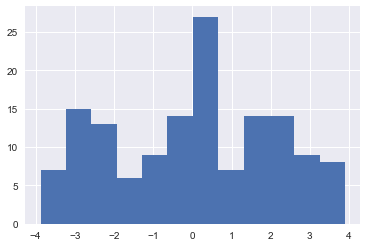

In [457]:
#this is not scaled data - need to scale it but not sure how 
y = data_df['IDI_2016_Value']
x_sets = (
    ['SDGI_Score'],['SDG1_190DAY_im'],['SDG2_CRLYLD'],['SDG2_CRLYLD'],['SDG2_NUE'],['SDG2_OBESITY'],['SDG2_UNDERNSH_im'],['SDG3_FERTILITY'],['SDG3_HALE'],['SDG3_MATMORT'],['SDG3_NEONAT'],['SDG3_PHYS'],['SDG3_SWB'],['SDG3_TB'],['SDG3_U5MORT'],['SDG3_VAC'],['SDG4_LITERACY'],['SDG4_PRIMARY'],['SDG4_SCHLYRS'],['SDG5_CONTRA'],['SDG5_EDAT'],['SDG5_PARL'],['SDG6_FRESHWAT'],['SDG6_IMPSAN'],['SDG6_IMPWAT'],['SDG7_CO2TWH'],['SDG7_ELECAC'],['SDG7_NSFUELAC'],['SDG8_ADJGROWTH'],['SDG8_ATMS'],['SDG8_CLABOR_im'],['SDG8_UNEMP'],['SDG9_INFRQUAL'],['SDG9_INTUSE'],['SDG9_LOGPERF'],['SDG9_RD_im'],['SDG10_GINI'],['SDG11_PIPEDWAT'],['SDG11_PM25'],['SDG12_MSW'],['SDG12_WASTEWAT'],['SDG13_CCVM'],['SDG13_CO2pCAP'],['SDG14_BIODIV'],['SDG14_CLEANWAT'],['SDG14_CPMA'],['SDG14_FISH'],['SDG14_FISHSTOCKS'],['SDG15_CPTA'],['SDG15_FORCHG'],['SDG15_REDLIST'],['SDG16_CPI'],['SDG16_GOVEFF'],['SDG16_HOMICIDE'],['SDG16_PRISON'],['SDG16_PRS'],['SDG16_SAFE'],['SDG16_U5REG'],['SDG17_GOVSPD'],['UNReg_Asia'],['UNReg_Europe'],['UNReg_LAC'],['UNReg_North America'],['UNReg_Oceania'],['UnRegSub_Caribbean'],['UnRegSub_Central America'],['UnRegSub_Central Asia'],['UnRegSub_Eastern Africa'],['UnRegSub_Eastern Asia'],['UnRegSub_Eastern Europe'],['UnRegSub_Middle Africa'],['UnRegSub_Northern Africa'],['UnRegSub_Northern America'],['UnRegSub_Northern Europe'],['UnRegSub_South America'],['UnRegSub_South-Eastern Asia'],['UnRegSub_Southern Africa'],['UnRegSub_Southern Asia'],['UnRegSub_Southern Europe'],['UnRegSub_Western Africa'],['UnRegSub_Western Asia'],['UnRegSub_Western Europe']
)

for x in x_sets:
    print ', '.join(x)
    get_linear_model_metrics(data_df[x], y, linear_model.LinearRegression())
    print

In [465]:
print 'Estimated intercept coefficient:', lm.intercept_
print 'Number of coefficients:', len(lm.coef_)


Estimated intercept coefficient: [  1.00576377e-04  -5.03803405e-05   1.74813712e-04   1.11686538e-04
   4.03042724e-04  -3.49627424e-04  -4.85593644e-04  -2.08805267e-04
   4.27322407e-04  -2.45224790e-04   2.96212123e-04  -4.37034279e-05
   5.07445358e-04   5.63288627e-04   3.30203678e-04   4.17610534e-04
   2.13661203e-04  -1.86043065e-04   4.20038502e-04   9.71187288e-06
   4.22466470e-04   8.49788877e-05   5.25655119e-04  -1.69957775e-04
  -4.85593644e-05   9.71187288e-06   2.33084949e-04   1.39608173e-04
   1.89381521e-04  -2.18517140e-04   2.42796823e-06   8.61928718e-05
   8.98348241e-05  -2.81644313e-04  -4.85593644e-06  -1.84525585e-04
  -5.82712373e-05   2.52508695e-04   4.41890216e-04   2.42796822e-04
  -1.94237458e-05  -1.44464109e-04   2.03949330e-04   2.10019251e-04
  -2.36119909e-04  -5.94852214e-05  -1.45678093e-05  -4.00614756e-05
   3.03496027e-05  -1.16542475e-04   1.55389966e-04  -1.35966220e-04
  -1.31110284e-04  -3.88474915e-05   1.45678093e-04  -4.85593644e-05
 

In [321]:
#why doesn't this work?
#columns = data_scaled[['SDGI_Score','SDG1_190DAY_im','SDG2_CRLYLD','SDG2_CRLYLD','SDG2_NUE','SDG2_OBESITY','SDG2_UNDERNSH_im','SDG3_FERTILITY','SDG3_HALE','SDG3_MATMORT','SDG3_NEONAT','SDG3_PHYS','SDG3_SWB','SDG3_TB','SDG3_U5MORT','SDG3_VAC','SDG4_LITERACY','SDG4_PRIMARY','SDG4_SCHLYRS','SDG5_CONTRA','SDG5_EDAT','SDG5_PARL','SDG6_FRESHWAT','SDG6_IMPSAN','SDG6_IMPWAT','SDG7_CO2TWH','SDG7_ELECAC','SDG7_NSFUELAC','SDG8_ADJGROWTH','SDG8_ATMS','SDG8_CLABOR_im','SDG8_UNEMP','SDG9_INFRQUAL','SDG9_INTUSE','SDG9_LOGPERF','SDG9_RD_im','SDG10_GINI','SDG11_PIPEDWAT','SDG11_PM25','SDG12_MSW','SDG12_WASTEWAT','SDG13_CCVM','SDG13_CO2pCAP','SDG14_BIODIV','SDG14_CLEANWAT','SDG14_CPMA','SDG14_FISH','SDG14_FISHSTOCKS','SDG15_CPTA','SDG15_FORCHG','SDG15_REDLIST','SDG16_CPI','SDG16_GOVEFF','SDG16_HOMICIDE','SDG16_PRISON','SDG16_PRS','SDG16_SAFE','SDG16_U5REG','SDG17_GOVSPD','IDI_2016_Value','UNReg_Asia','UNReg_Europe','UNReg_LAC','UNReg_North America','UNReg_Oceania','UnRegSub_Caribbean','UnRegSub_Central America','UnRegSub_Central Asia','UnRegSub_Eastern Africa','UnRegSub_Eastern Asia','UnRegSub_Eastern Europe','UnRegSub_Middle Africa','UnRegSub_Northern Africa','UnRegSub_Northern America','UnRegSub_Northern Europe','UnRegSub_South America','UnRegSub_South-Eastern Asia','UnRegSub_Southern Africa','UnRegSub_Southern Asia','UnRegSub_Southern Europe','UnRegSub_Western Africa','UnRegSub_Western Asia','UnRegSub_Western Europe']]
   


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  from ipykernel import kernelapp as app


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
#scikit learn gridsearch with the model (linear regression lesson - check it out)
#check out the coefficients, which are the highest
#to go one step further, run lasso to drop the irrelevant coefficients
#gridsearch with ridge, see the score

#totally seperately, could do clustering to figure out how similar other countries are to each other

In [489]:
#here is also an OLS model with the non-scaled data 
import statsmodels.formula.api as smf
lm = smf.ols(formula='IDI_2016_Value ~ SDGI_Score + SDG1_190DAY_im + SDG2_CRLYLD + SDG2_CRLYLD + SDG2_NUE + SDG2_OBESITY + SDG2_UNDERNSH_im + SDG3_FERTILITY + SDG3_HALE + SDG3_MATMORT + SDG3_NEONAT + SDG3_PHYS + SDG3_SWB + SDG3_TB + SDG3_U5MORT + SDG3_VAC + SDG4_LITERACY + SDG4_PRIMARY + SDG4_SCHLYRS + SDG5_CONTRA + SDG5_EDAT + SDG5_PARL + SDG6_FRESHWAT + SDG6_IMPSAN + SDG6_IMPWAT + SDG7_CO2TWH + SDG7_ELECAC + SDG7_NSFUELAC + SDG8_ADJGROWTH + SDG8_ATMS + SDG8_CLABOR_im + SDG8_UNEMP + SDG9_INFRQUAL + SDG9_INTUSE + SDG9_LOGPERF + SDG9_RD_im + SDG10_GINI + SDG11_PIPEDWAT + SDG11_PM25 + SDG12_MSW + SDG12_WASTEWAT + SDG13_CCVM + SDG13_CO2pCAP + SDG14_BIODIV + SDG14_CLEANWAT + SDG14_CPMA + SDG14_FISH + SDG14_FISHSTOCKS + SDG15_CPTA + SDG15_FORCHG + SDG15_REDLIST + SDG16_CPI + SDG16_GOVEFF + SDG16_HOMICIDE + SDG16_PRISON + SDG16_PRS + SDG16_SAFE + SDG16_U5REG + SDG17_GOVSPD', data=data_df).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         IDI_2016_Value   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     27.72
Date:                Sun, 21 May 2017   Prob (F-statistic):           1.19e-36
Time:                        14:03:34   Log-Likelihood:                -99.464
No. Observations:                 143   AIC:                             316.9
Df Residuals:                      84   BIC:                             491.7
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           -7.6333      3.409     -2.239      0.028       -14.413    -0.854
SDGI_Score           0.0907      0.054      1.673      0.098        -0.017     0.198
SDG1_190DAY_im      -0.0064      0.009     -0.698      0.487        -0.025     0.012
SDG2_CRLYLD          0.0206      0.044      0.467      0.642        -0.067     0.108
SDG2_NUE            -0.3231      0.439     -0.735      0.464        -1.197     0.551
SDG2_OBESITY        -0.0143      0.018     -0.788      0.433        -0.050     0.022
SDG2_UNDERNSH_im     0.0414      0.010      4.021      0.000         0.021     0.062
SDG3_FERTILITY       0.0005      0.003      0.138      0.891        -0.006     0.007
SDG3_HALE            0.0162      0.036      0.453      0.652        -0.055     0.088
SDG3_MATMORT         0.0034      0.001      3.992      0.000         0.002     0.005
SDG3_NEONAT          0.0460      0.026      1.767      0.081        -0.006     0.098
SDG3_PHYS            0.1791      0.078      2.282      0.025         0.023     0.335
SDG3_SWB             0.1135      0.117      0.972      0.334        -0.119     0.345
SDG3_TB              0.0011      0.001      1.238      0.219        -0.001     0.003
SDG3_U5MORT         -0.0226      0.012     -1.808      0.074        -0.047     0.002
SDG3_VAC            -0.0100      0.009     -1.077      0.285        -0.028     0.008
SDG4_LITERACY        0.0007      0.012      0.061      0.951        -0.022     0.024
SDG4_PRIMARY         0.0022      0.011      0.191      0.849        -0.021     0.025
SDG4_SCHLYRS         0.1370      0.059      2.303      0.024         0.019     0.255
SDG5_CONTRA          0.0131      0.006      2.182      0.032         0.001     0.025
SDG5_EDAT           -0.0039      0.007     -0.533      0.595        -0.019     0.011
SDG5_PARL           -0.0106      0.006     -1.669      0.099        -0.023     0.002
SDG6_FRESHWAT        0.0005      0.000      1.301      0.197        -0.000     0.001
SDG6_IMPSAN          0.0011      0.008      0.142      0.887        -0.014     0.016
SDG6_IMPWAT         -0.0062      0.011     -0.544      0.588        -0.029     0.017
SDG7_CO2TWH          0.0155      0.091      0.171      0.864        -0.165     0.196
SDG7_ELECAC         -0.0017      0.009     -0.186      0.853        -0.020     0.017
SDG7_NSFUELAC        0.0077      0.007      1.094      0.277        -0.006     0.022
SDG8_ADJGROWTH      -0.0433      0.043     -1.009      0.316        -0.129     0.042
SDG8_ATMS            0.0046      0.002      1.991      0.050      4.61e-06     0.009
SDG8_CLABOR_im      -0.0022      0.011     -0.191      0.849        -0.025     0.020
SDG8_UNEMP          -0.0043      0.016     -0.274      0.785        -0.035     0.027
SDG9_INFRQUAL       -0.0175      0.139     -0.126      0.900        -0.293     0.258
SDG9_INTUSE          0.

In [490]:
lm.pvalues

Intercept           0.027795
SDGI_Score          0.098003
SDG1_190DAY_im      0.486840
SDG2_CRLYLD         0.641551
SDG2_NUE            0.464268
SDG2_OBESITY        0.432996
SDG2_UNDERNSH_im    0.000126
SDG3_FERTILITY      0.890550
SDG3_HALE           0.651769
SDG3_MATMORT        0.000140
SDG3_NEONAT         0.080795
SDG3_PHYS           0.025025
SDG3_SWB            0.333658
SDG3_TB             0.219166
SDG3_U5MORT         0.074147
SDG3_VAC            0.284532
SDG4_LITERACY       0.951468
SDG4_PRIMARY        0.849301
SDG4_SCHLYRS        0.023723
SDG5_CONTRA         0.031915
SDG5_EDAT           0.595186
SDG5_PARL           0.098924
SDG6_FRESHWAT       0.196800
SDG6_IMPSAN         0.887280
SDG6_IMPWAT         0.587901
SDG7_CO2TWH         0.864379
SDG7_ELECAC         0.852683
SDG7_NSFUELAC       0.277156
SDG8_ADJGROWTH      0.316030
SDG8_ATMS           0.049774
SDG8_CLABOR_im      0.848910
SDG8_UNEMP          0.784606
SDG9_INFRQUAL       0.900130
SDG9_INTUSE         0.010516
SDG9_LOGPERF  

In [491]:
lm.conf_int()

,0,1
Intercept,-14.412802,-0.853817
SDGI_Score,-0.017090,0.198424
SDG1_190DAY_im,-0.024767,0.011892
SDG2_CRLYLD,-0.067095,0.108305
SDG2_NUE,-1.197058,0.550850
SDG2_OBESITY,-0.050450,0.021818
SDG2_UNDERNSH_im,0.020925,0.061881
SDG3_FERTILITY,-0.006211,0.007138
SDG3_HALE,-0.055042,0.087510
SDG3_MATMORT,0.001730,0.005164


In [492]:
lm.params

Intercept          -7.633309
SDGI_Score          0.090667
SDG1_190DAY_im     -0.006438
SDG2_CRLYLD         0.020605
SDG2_NUE           -0.323104
SDG2_OBESITY       -0.014316
SDG2_UNDERNSH_im    0.041403
SDG3_FERTILITY      0.000463
SDG3_HALE           0.016234
SDG3_MATMORT        0.003447
SDG3_NEONAT         0.045969
SDG3_PHYS           0.179090
SDG3_SWB            0.113451
SDG3_TB             0.001084
SDG3_U5MORT        -0.022599
SDG3_VAC           -0.009956
SDG4_LITERACY       0.000709
SDG4_PRIMARY        0.002180
SDG4_SCHLYRS        0.136999
SDG5_CONTRA         0.013136
SDG5_EDAT          -0.003945
SDG5_PARL          -0.010631
SDG6_FRESHWAT       0.000512
SDG6_IMPSAN         0.001071
SDG6_IMPWAT        -0.006248
SDG7_CO2TWH         0.015542
SDG7_ELECAC        -0.001750
SDG7_NSFUELAC       0.007702
SDG8_ADJGROWTH     -0.043348
SDG8_ATMS           0.004571
SDG8_CLABOR_im     -0.002156
SDG8_UNEMP         -0.004262
SDG9_INFRQUAL      -0.017466
SDG9_INTUSE         0.019736
SDG9_LOGPERF  

In [ ]:
#scikit learn gridsearch with the model (linear regression lesson - check it out) 
#^did this but need help putting the scaled data back in 
#check out the coefficients, which are the highest
#to go one step further, run lasso to drop the irrelevant coefficients
#gridsearch with ridge, see the score

#totally seperately, could do clustering to figure out how similar other countries are to each other

